Part 1 : Frequency counts

In [9]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read csv file
df = pd.read_csv("Salaries.csv")

In [41]:
df.head(20)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [42]:
df.rank.value_counts(dropna=False)

AttributeError: 'function' object has no attribute 'value_counts'

In [43]:
#Data type all column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


Part 2: Summary statistics and filtering

In [44]:
# If you are looking to return all fundamental statistics for a numerical variable, 
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [45]:
#Select an observation with the value in the salary column > 120000
df_sub = df[ df['salary'] > 120000]
df_sub.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
3,Prof,A,40,31,Male,131205
5,Prof,A,20,20,Male,122400
7,Prof,A,18,18,Male,126300
10,Prof,B,39,33,Male,128250


In [46]:
# indexes and columns names
df_sub.axes

[Index([ 0,  3,  5,  7, 10, 11, 13, 14, 15, 19, 26, 27, 29, 31, 35, 36, 39, 40,
        44, 45, 49, 51, 58, 72, 75],
       dtype='int64'),
 Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')]

In [47]:
#Select data for female professors
df_female = df[ df['sex'] == 'Female']
df_female.head()

,rank,discipline,phd,service,sex,salary
39,Prof,B,18,18,Female,129000
40,Prof,A,39,36,Female,137000
41,AssocProf,A,13,8,Female,74830
42,AsstProf,B,4,2,Female,80225
43,AsstProf,B,5,0,Female,77000


In [48]:
# Using filtering, find the mean value of the salary for the discipline A
df[ df['discipline'] =='A'].salary.mean()

98331.11111111111

Part 3: Slicing the dataset


In [49]:
#Select column salary
df1 = df['salary']

In [50]:
#Check the data type of the data frame.
type(df1)

pandas.core.series.Series

In [51]:
#Look at the first few elements of the output
df1.head()

0    186960
1     93000
2    110515
3    131205
4    104800
Name: salary, dtype: int64

In [52]:
#Select column salary and make the output to be a data frame
df2 = df[['salary']]

In [53]:
#Check the type
type(df2)

pandas.core.frame.DataFrame

In [54]:
# Note 1: The location of the first row is 0
# Note 2: The last value in the range is not included
df_first10_rows=df[0:11]
df_first10_rows.head(5)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


In [7]:
# we use the columns labels and raw indexes

df_sub = df.loc[10:20,['rank', 'sex','salary']]
print(df_sub)

NameError: name 'df' is not defined

In [58]:
df_sub.head(3)

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
12,AsstProf,Male,88000


In [59]:
#df_sub.iloc[10:20, [0,3,4,5]]
df.iloc[0:10,[0,4]]

,rank,sex
0,Prof,Male
1,Prof,Male
2,Prof,Male
3,Prof,Male
4,Prof,Male
5,Prof,Male
6,AssocProf,Male
7,Prof,Male
8,Prof,Male
9,Prof,Male


Part 4: Sorting the Data

In [20]:
#Sort the data frame by yrs.service and create a new one
df_sorted = df.sort_values(by = 'service')
df_sorted.head()

,rank,discipline,phd,service,sex,salary
55,AsstProf,A,2,0,Female,72500
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000


In [21]:
#Sort the data frame by yrs.service and overwrite the original dataset
df.sort_values(by = 'service', ascending = False, inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary
9,Prof,A,51,51,Male,57800
0,Prof,B,56,49,Male,186960
36,Prof,B,45,45,Male,146856
27,Prof,A,45,43,Male,155865
40,Prof,A,39,36,Female,137000


In [23]:
 #Restore the original order 
df.sort_index(axis=0, ascending = True, inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


Part 5: Explore data using graphics

In [61]:
#Show graphs withint Python notebook
%matplotlib inline

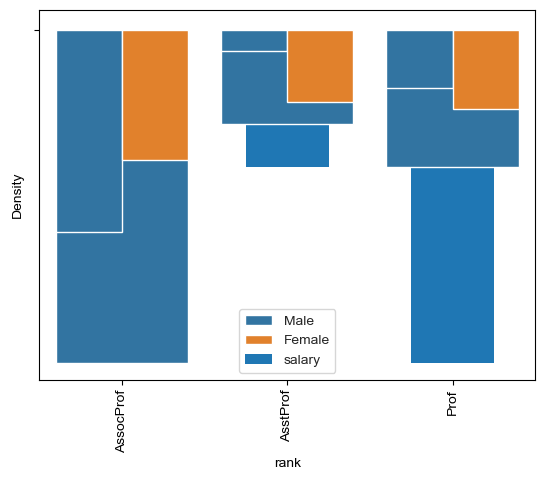

In [64]:
#Use matplotlib to draw a histogram of a salary data
plt.hist(df['salary'],bins=10, density= True)
plt.show()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_15816\2831997804.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary']);


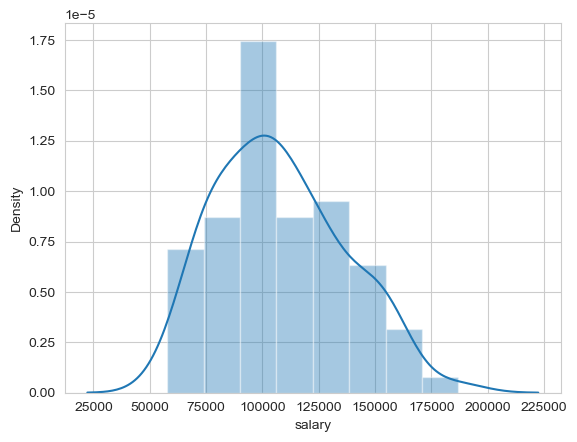

In [65]:
#Use seaborn package to draw a histogram
sns.distplot(df['salary']);
plt.show()

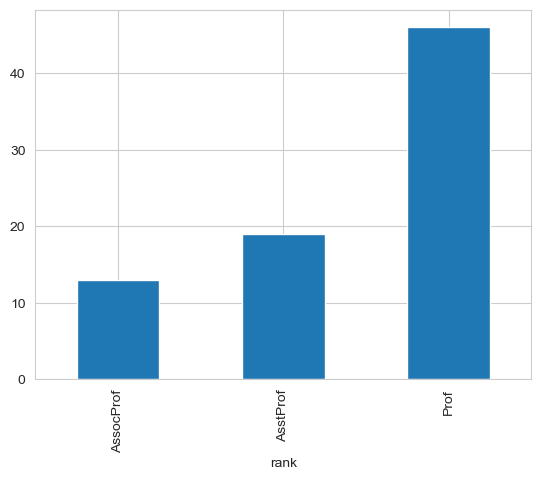

In [66]:
# Use regular matplotlib function to display a barplot
df.groupby(['rank'])['salary'].count().plot(kind='bar')
plt.show()

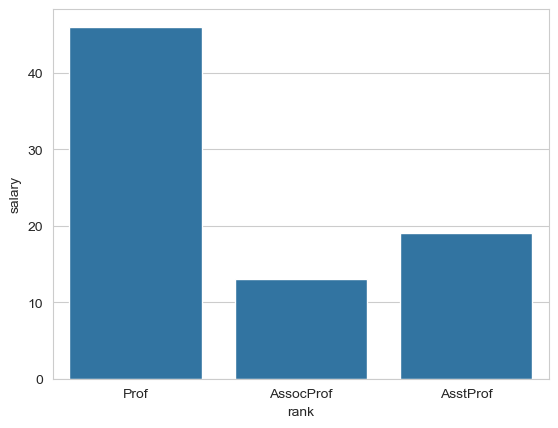

In [67]:
# Use seaborn package to display a barplot
sns.set_style("whitegrid")

ax = sns.barplot(x='rank',y ='salary', data=df, estimator=len)
plt.show()

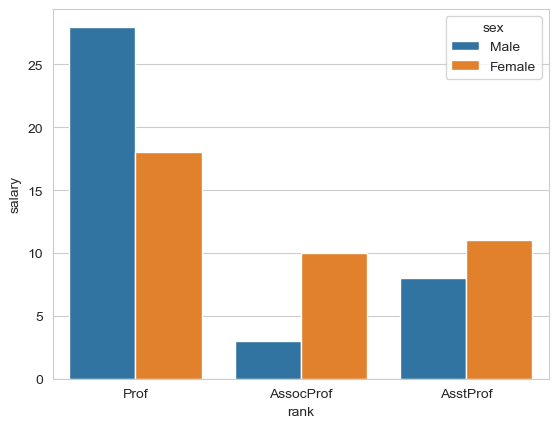

In [68]:
# Split into 2 groups:
ax = sns.barplot(x='rank',y ='salary', hue='sex', data=df, estimator=len)
plt.show()

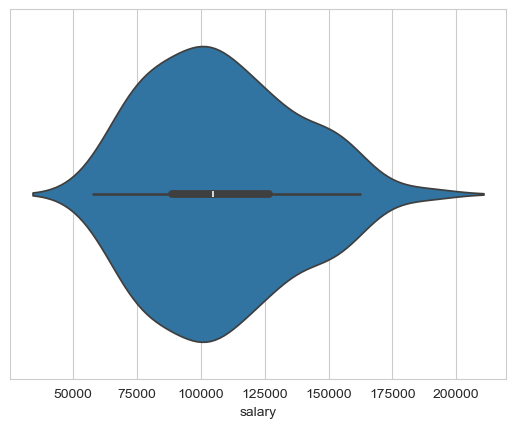

In [69]:
#Violinplot
sns.violinplot(x = "salary", data=df)
plt.show()

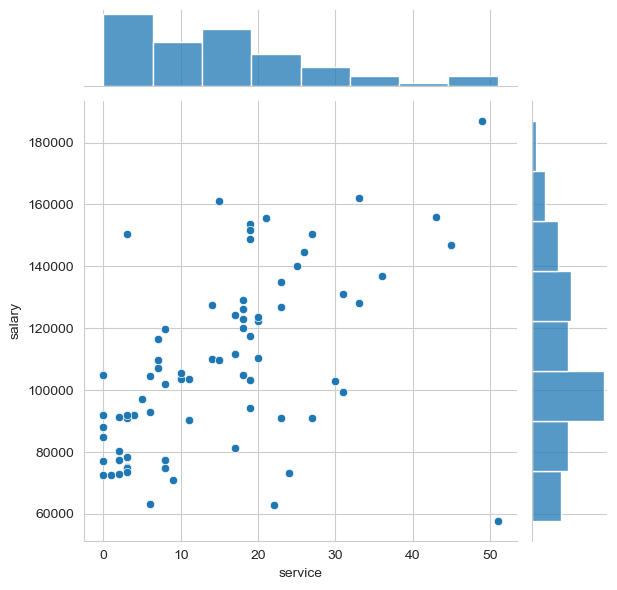

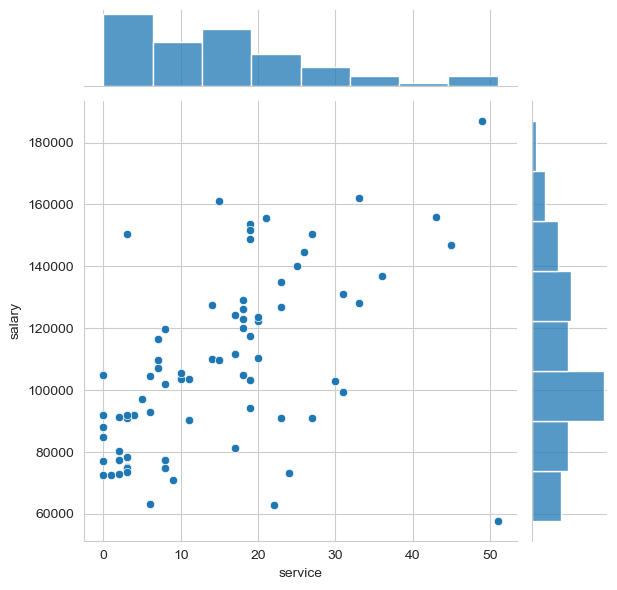

In [71]:
#Scatterplot in seaborn
sns.jointplot(x='service', y='salary', data=df)
plt.show()

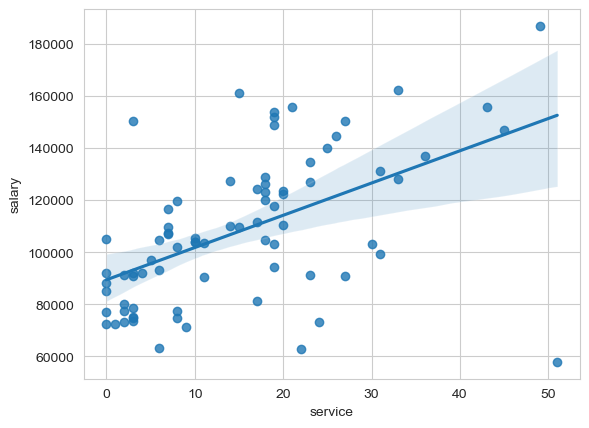

In [72]:
#If we are interested in linear regression plot for 2 numeric variables we can use regplot
sns.regplot(x='service', y='salary', data=df)
plt.show()

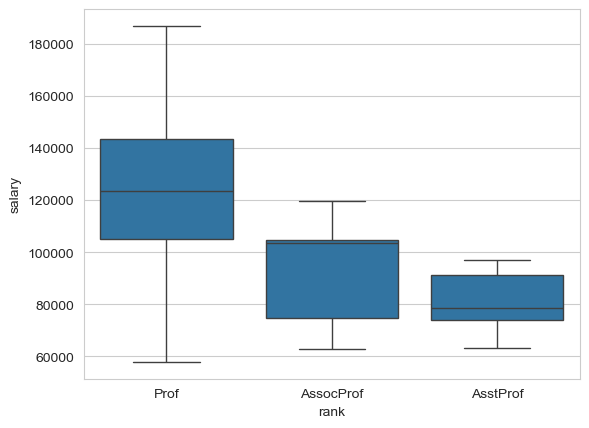

In [73]:
# box plot
sns.boxplot(x='rank',y='salary', data=df)
plt.show()

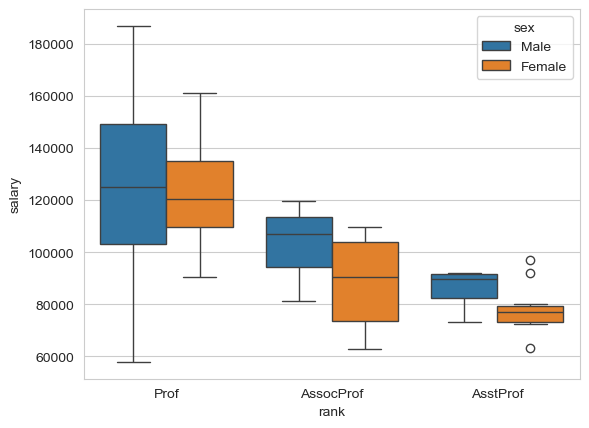

In [74]:
# side-by-side box plot
sns.boxplot(x='rank',y='salary', data=df, hue='sex')
plt.show()

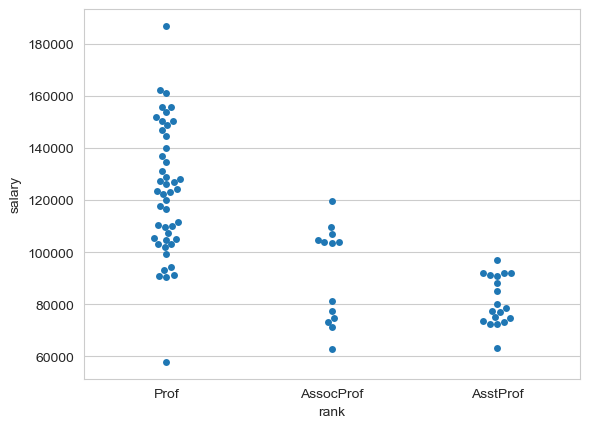

In [75]:
# swarm plot
sns.swarmplot(x='rank',y='salary', data=df)
plt.show()

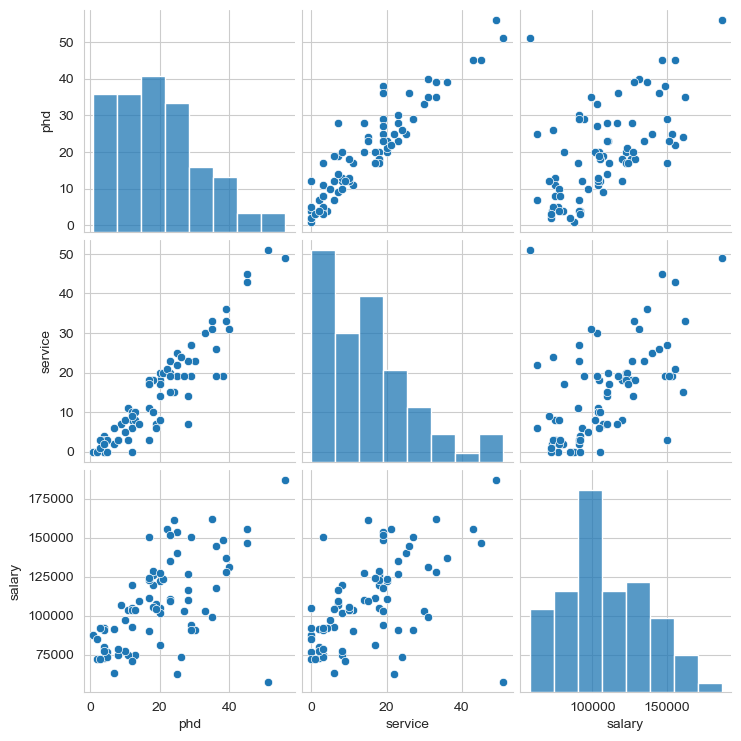

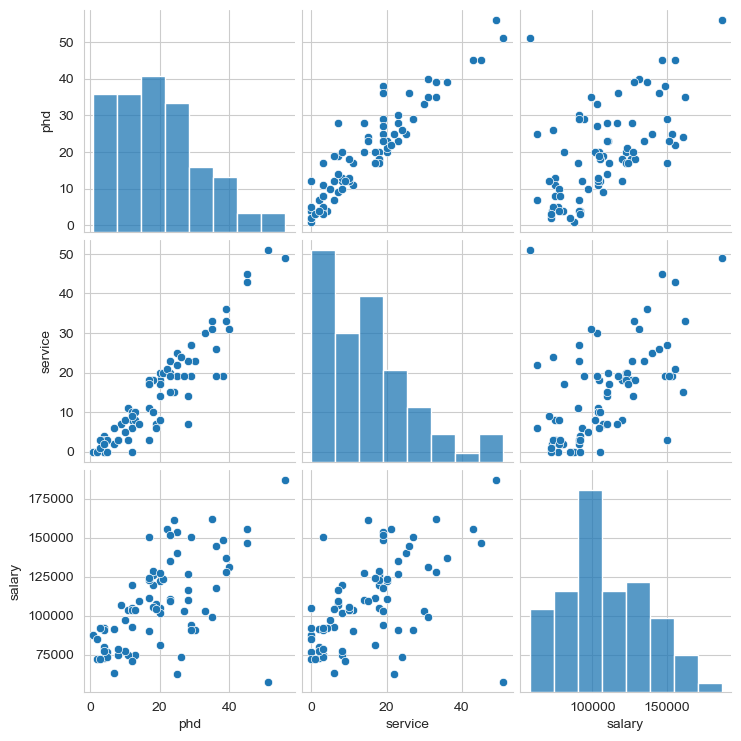

In [77]:
# Pairplot 
sns.pairplot(df)
plt.show()